In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Katia\Documents\UofT\STATS\final_project\df_cleaned.csv')
df.head(3)

,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (approved),Target
0,1.0,0.0,0,1.0
1,0.0,0.0,6,0.0
2,0.0,0.0,0,1.0


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Tuition fees up to date','Scholarship holder','Curricular units 1st sem (approved)']], 
                                                    df['Target'], 
                                                    test_size=0.3, 
                                                    random_state=13)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaled data from array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['Tuition fees up to date','Scholarship holder','Curricular units 1st sem (approved)'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['Tuition fees up to date','Scholarship holder','Curricular units 1st sem (approved)'])

# Create a logistic regression model (no incercept)
logistic_reg_model = LogisticRegression(random_state=13,
                                        # C=6,
                                        fit_intercept=False)

# Train the model
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = logistic_reg_model.predict(X_test_scaled)

# Accuracy of predictions on training data
y_score_train = logistic_reg_model.score(X_train_scaled, y_train)
# Accuracy of predictions on testing data
y_score_test = logistic_reg_model.score(X_test_scaled, y_test)

# Coefficients
logistic_reg_model.get_params

# How well is the model predicting
print('Train score: ', y_score_train)
print('Test score: ', y_score_test, '\n')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Evaluation metrics
print('Accuracy: ', accuracy, '\n')
print('Confusion Matrix:\n', conf_matrix, '\n')
print('Classification Report:\n', classification_rep, '\n')

Train score:  0.8654073199527745
Test score:  0.8512396694214877 

Accuracy:  0.8512396694214877 

Confusion Matrix:
 [[591  67]
 [ 95 336]] 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       658
         1.0       0.83      0.78      0.81       431

    accuracy                           0.85      1089
   macro avg       0.85      0.84      0.84      1089
weighted avg       0.85      0.85      0.85      1089
 



In [9]:
print('intercept ', logistic_reg_model.intercept_[0])
print('classes', logistic_reg_model.classes_)
pd.DataFrame({'coeff': logistic_reg_model.coef_[0]}, 
             index=X_train_scaled.columns)

intercept  0.0
classes [0. 1.]


,coeff
Tuition fees up to date,-1.616277
Scholarship holder,-0.505821
Curricular units 1st sem (approved),-1.758803


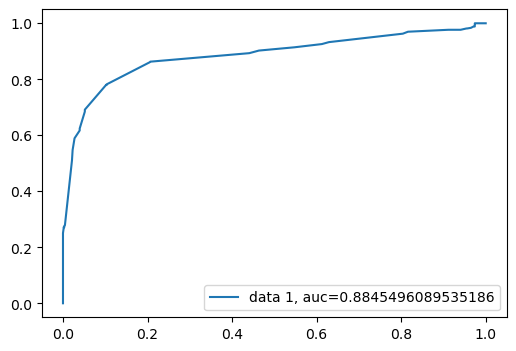

In [4]:
# Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
# It shows the tradeoff between sensitivity and specificity.
y_pred_probability = logistic_reg_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_probability)
auc = roc_auc_score(y_test, y_pred_probability)

fig = plt.figure(figsize = (6,4))

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
[[True Negative (TN), False Positive (FP)]
 [False Negative (FN), True Positive (TP)]]
